## Multiple dimensions
Recall linear first-order DE
$$
x_t = a x_{t-1}
$$
If $\mathbf x_t$ is an $N\times 1$ vector,
$$
\mathbf x_t = \mathbf A \mathbf x_{t-1}
$$
with $\mathbf A$ being $N\times N$.
## Every DE is first order
Take second order DE
$$
x_t = a_1 x_{t-1} + a_2 x_{t-2}
$$
Introduce new state variable,
$$
\tilde {\mathbf x}_t \equiv 
\begin{pmatrix}
x_t\\
x_{t-1}
\end{pmatrix}
$$
$$
\tilde{\mathbf x}_t = \tilde{\mathbf A} \tilde{\mathbf x}_{t-1}
$$
$$
\tilde {\mathbf x}_{t-1}=
\begin{pmatrix}
x_{t-1}\\
x_{t-2}
\end{pmatrix}
$$
with 
$$
\tilde {\mathbf A} = 
\begin{bmatrix}
a_1 & a_2\\
1 & 0
\end{bmatrix}
$$


In [5]:
function forecast_ndim(A::Array{Float64,2}, x0::Vector{Float64})::Array{Float64,2}
    T = 30
    N, whatever = size(A)
    x = zeros(N, T)
    x[:, 1] = x0
    # thanks for the comment, this should be T
    for t = 2:T
        x[:, t] = A * x[:, t-1]
    end
    return(x)
end

forecast_ndim (generic function with 2 methods)

In [19]:
A = [0.9 0.4; -0.4 0.9]
z = forecast_ndim(A, [1.0, 0.0])

2×30 Matrix{Float64}:
 1.0   0.9   0.65   0.297  -0.0959  -0.46071  …  0.193658  0.427866  0.582311
 0.0  -0.4  -0.72  -0.908  -0.936   -0.80404     0.633934  0.493078  0.272623

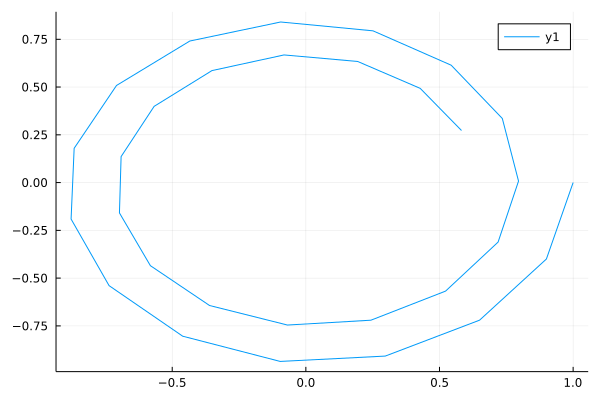

In [20]:
using Plots
plot(z[1,:], z[2,:])

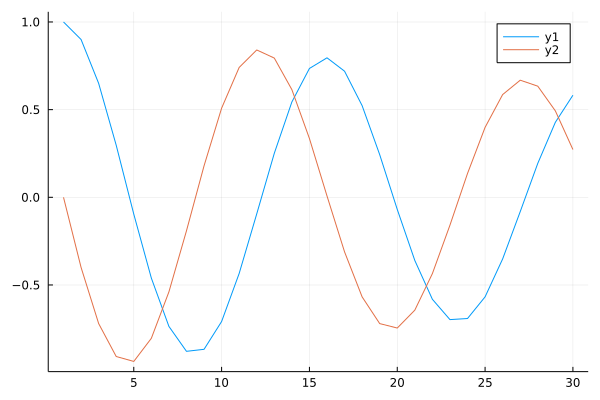

In [18]:
plot(z')

### Forecasting
Repeat (*)
$$
\mathbf x_t = \mathbf A^2\mathbf x_{t-2} = \mathbf A^t \mathbf x_0
$$
where $\mathbf A^t = \mathbf A \cdot \mathbf A ...$

### Eigen-value decomposition of A
$$
\mathbf A \equiv
\mathbf Q
\mathbf \Lambda
\mathbf Q^{-1}
$$
then
$$
\mathbf v_t \equiv \mathbf Q^{-1} \mathbf x_t
$$
will imply
$$
\mathbf v_t = \mathbf \Lambda \mathbf v_{t-1}
\tag{**}
$$
bc
$$
\mathbf Q^{-1} \mathbf x_t = \mathbf \Lambda
\mathbf Q^{-1} \mathbf x_{t-1}
$$
so that (*) and (\*\*) are the same.
But
$$
\mathbf \Lambda ^t = [\lambda_{i}^t]
$$
Two features of eigenvalues are important for dynamics
1. $|\lambda_i| <>1$
2. $\lambda_i$ real or complex

### Properties of eigenvalue
eigevalue scalar $\lambda_i$ with eigenvector $\mathbf v_i$
$$
\mathbf A \mathbf v_i = \lambda_i\mathbf v_i
$$
Notes:
1. If $\mathbf v_i$ is eigenvector, then so if $\mu\mathbf v_i$ 
2. at most $N$ different $\lambda_i$

$$
(\mathbf A - \lambda_i\mathbf I) \mathbf v_i = \mathbf 0
$$
$$
\det(\mathbf A - \lambda_i\mathbf I) = 0
$$
if $N=2$
$$
\mathbf A - \lambda_i\mathbf I
= 
\begin{bmatrix}
a_{11} - \lambda_i & a_{12}\\
a_{21}  & a_{22} - \lambda_i
\end{bmatrix}
$$
det of which
$$
(a_{11}-\lambda)(a_{22}-\lambda) 
- a_{12}a_{21} = 0,
$$
quadratic in $\lambda$, with two roots.
* might have the same value $\lambda_1=\lambda_2$
* might be complex conjugates, $\lambda_i = l \pm m i$
* whenever $\lambda_i$ complex, so is $\mathbf v_i$


In [24]:
using LinearAlgebra
v = eigen(A)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
2-element Vector{ComplexF64}:
 0.9 - 0.4im
 0.9 + 0.4im
vectors:
2×2 Matrix{ComplexF64}:
 0.707107-0.0im       0.707107+0.0im
      0.0-0.707107im       0.0+0.707107im

In [25]:
v.values

2-element Vector{ComplexF64}:
 0.9 - 0.4im
 0.9 + 0.4im

In [26]:
A = [0.9 0.1; 0.0 1.0]

2×2 Matrix{Float64}:
 0.9  0.1
 0.0  1.0

In [27]:
v = eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 0.9
 1.0
vectors:
2×2 Matrix{Float64}:
 1.0  0.707107
 0.0  0.707107

In [30]:
v1 = v.vectors[:, 1]
λ1 = v.values[1]

0.9

In [31]:
A * v1 == λ1 * v1

true

In [32]:
v2 = v.vectors[:, 2]
λ2 = v.values[2]
A * v2 == λ2 * v2

true

In [35]:
Z = forecast_ndim(A, v2)

2×30 Matrix{Float64}:
 0.707107  0.707107  0.707107  0.707107  …  0.707107  0.707107  0.707107
 0.707107  0.707107  0.707107  0.707107     0.707107  0.707107  0.707107

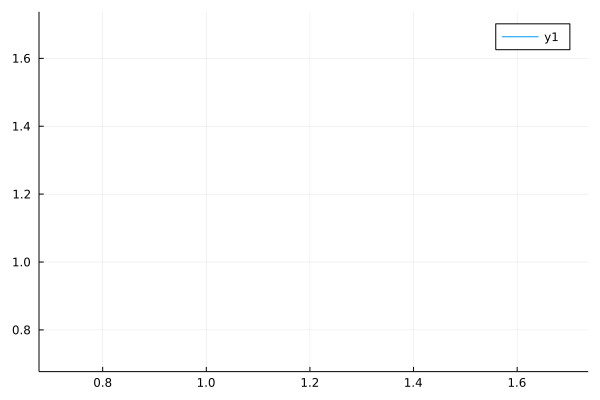

In [36]:
plot(Z[1, :], Z[2, :])